In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import trapz

df = pd.read_csv("predictions.csv")
df.head(100)

,actual,prediction
0,0,0.827142
1,0,0.604460
2,0,0.791634
3,0,0.160805
4,0,0.611223
...,...,...
95,1,0.713790
96,1,0.487648
97,1,0.630273
98,1,0.531094


In [ ]:
#TODO LIST:
# 2. Transformar sobe e desce em 0 e 1


In [76]:
thresholds = list(np.array(list(range(0, 1000+1, 1)))/1000)

roc_point = []

for threshold in thresholds:

    tp = 0; fp = 0; fn = 0; tn = 0

    for index, instance in df.iterrows():
        actual = instance["actual"]
        prediction = instance["prediction"]

        if prediction >= threshold:
            prediction_class = 1
        else:
            prediction_class = 0

        if prediction_class == 1 and actual == 1:
            tp = tp + 1
        elif actual == 1 and prediction_class == 0:
            fn = fn + 1
        elif actual == 0 and prediction_class == 1: 
            fp = fp + 1
        elif actual == 0 and prediction_class == 0:
            tn = tn + 1

    #print(tp, fp, fn, tn)

    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)

    #print(tpr, fpr)
    roc_point.append([tpr, fpr])

In [81]:
pivot = pd.DataFrame(roc_point, columns = ["x", "y"])
pivot["threshold"] = thresholds
pivot.sample(20)

,x,y,threshold
172,0.0,0.0,0.172
613,0.0,0.0,0.613
701,0.0,0.0,0.701
964,0.0,0.0,0.964
364,0.0,0.0,0.364
946,0.0,0.0,0.946
399,0.0,0.0,0.399
32,0.0,0.0,0.032
293,0.0,0.0,0.293
199,0.0,0.0,0.199


In [78]:
roc_point = []
thresholds = list(np.array(list(range(0, 1000+1, 1)))/1000)
 
for threshold in thresholds:
   roc_point.append([tpr, fpr])

In [79]:
pivot[pivot['threshold'] == 0.5]

,x,y,threshold
500,0.74,0.24,0.5


Text(0, 0.5, 'true positive rate')

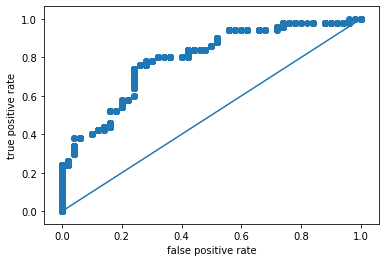

In [80]:
plt.scatter(pivot.y, pivot.x)
plt.plot([0, 1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')